# Example: Reading vector data

This example illustrates the how to read raster data using the HydroMT [DataCatalog](../_generated/hydromt.data_catalog.DataCatalog.rst) with the `vector` or `vector_table`  drivers.

In [1]:
import pandas as pd

import hydromt

# Download artifacts for the Piave basin to `~/.hydromt_data/`.
data_catalog = hydromt.DataCatalog(data_libs=["artifact_data=v1.0.0"])

## Pyogrio driver

To read vector data and parse it into a [geopandas.GeoDataFrame](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html) object we use the [geopandas.read_file](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html) method, see the [geopandas documentation](https://geopandas.org/en/stable/docs/user_guide/io.html#reading-spatial-data) for details. Geopandas supports many file formats, see below. For large datasets we recommend using data formats which contain a spatial index, such as 'GeoPackage (GPKG)' or 'FlatGeoBuf' to speed up reading spatial subsets of the data. Here we use a spatial subset of the [Database of Global Administrative Areas (GADM)](https://gadm.org/download_world.html) level 3 units.

In [2]:
# inspect data source entry in data catalog yaml file
data_catalog.get_source("gadm_level3")

GeoDataFrameSource(name='gadm_level3', uri='gadm_level3.gpkg', data_adapter=GeoDataFrameAdapter(unit_add={}, unit_mult={}, rename={}), driver=PyogrioDriver(filesystem=<fsspec.implementations.local.LocalFileSystem object at 0x737baafc42b0>, options={}), uri_resolver=ConventionResolver(filesystem=<fsspec.implementations.local.LocalFileSystem object at 0x737baafc42b0>, options={}), root='/home/sam/.hydromt/artifact_data/v1.0.0', version='1.0', provider=None, metadata=SourceMetadata(crs=<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
, unit=None, extent={}, nodata=None, attrs={}, category='geography', notes='last downloaded 2020-10-19; license required for commercial use', url='https://gadm.org/download_world.html', author='gadm', li

We can load any GeoDataFrame using the [get_geodataframe()](../_generated/hydromt.data_catalog.DataCatalog.get_geodataframe.rst) method of the DataCatalog. Note that if we don't provide any arguments it returns the full dataset with nine data variables and for the full spatial domain. Only the data coordinates are actually read, the data variables are still loaded lazy.

In [3]:
gdf = data_catalog.get_geodataframe("gadm_level3")
print(f"number of rows: {gdf.index.size}")
gdf.head()

object: PyogrioDriver does not use kwarg predicate with value intersects.


object: PyogrioDriver does not use kwarg metadata with value crs=<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 unit=None extent={} nodata=None attrs={} category='geography' notes='last downloaded 2020-10-19; license required for commercial use' url='https://gadm.org/download_world.html' author='gadm' license='https://gadm.org/license.html'.


number of rows: 509


,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,ITA,Italy,ITA.17_1,Trentino-Alto Adige,None,ITA.17.2_1,Trento,None,ITA.17.2.143_1,Predazzo,None,None,Commune,Commune,None,IT.TN.PA,"MULTIPOLYGON (((11.74692 46.30762, 11.74614 46..."
1,ITA,Italy,ITA.17_1,Trentino-Alto Adige,None,ITA.17.2_1,Trento,None,ITA.17.2.115_1,Moena,None,None,Commune,Commune,None,IT.TN.MN,"MULTIPOLYGON (((11.82119 46.37751, 11.82013 46..."
2,ITA,Italy,ITA.17_1,Trentino-Alto Adige,None,ITA.17.2_1,Trento,None,ITA.17.2.214_1,Vigo Di Fassa,None,None,Commune,Commune,None,IT.TN.VD,"MULTIPOLYGON (((11.62028 46.43951, 11.62063 46..."
3,ITA,Italy,ITA.17_1,Trentino-Alto Adige,None,ITA.17.2_1,Trento,None,ITA.17.2.36_1,Canal San Bovo,None,None,Commune,Commune,None,IT.TN.CB,"MULTIPOLYGON (((11.75179 46.10603, 11.7521 46...."
4,ITA,Italy,ITA.17_1,Trentino-Alto Adige,None,ITA.17.2_1,Trento,None,ITA.17.2.141_1,Pozza Di Fassa,None,None,Commune,Commune,None,IT.TN.PF,"MULTIPOLYGON (((11.70521 46.401, 11.70519 46.4..."


We can request a (spatial) subset data by providing additional `variables` and `bbox` / `geom` arguments. Note that this returns less polygons (rows) and only two columns with attribute data,

In [4]:
gdf_subset = data_catalog.get_geodataframe(
    "gadm_level3", bbox=gdf[:5].total_bounds, variables=["GID_0", "NAME_3"]
)
print(f"number of rows: {gdf_subset.index.size}")
gdf_subset.head()

object: ConventionResolver does not use kwarg mask with value                                             geometry
0  POLYGON ((11.8513 46.09649, 11.8513 46.47683, ....


object: PyogrioDriver does not use kwarg predicate with value intersects.


object: PyogrioDriver does not use kwarg metadata with value crs=<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 unit=None extent={} nodata=None attrs={} category='geography' notes='last downloaded 2020-10-19; license required for commercial use' url='https://gadm.org/download_world.html' author='gadm' license='https://gadm.org/license.html'.


number of rows: 28


,GID_0,NAME_3,geometry
0,ITA,Tonadico,"MULTIPOLYGON (((11.84245 46.30723, 11.83778 46..."
1,ITA,Siror,"MULTIPOLYGON (((11.86518 46.27297, 11.86086 46..."
2,ITA,Ziano Di Fiemme,"MULTIPOLYGON (((11.55856 46.32783, 11.56022 46..."
3,ITA,Predazzo,"MULTIPOLYGON (((11.74692 46.30762, 11.74614 46..."
4,ITA,Canale d' Agordo,"MULTIPOLYGON (((11.86518 46.27297, 11.86392 46..."


## Vector_table driver

In [5]:
# create example point CSV data with funny `x` coordinate name and additional column
import numpy as np

path = "tmpdir/xy.csv"
df = pd.DataFrame(
    columns=["x_centroid", "y"],
    data=np.vstack([gdf_subset.centroid.x, gdf_subset.centroid.y]).T,
)
df["name"] = gdf_subset["NAME_3"]
df.to_csv(path)  # write to file
df.head()

/tmp/ipykernel_102122/1248131901.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data=np.vstack([gdf_subset.centroid.x, gdf_subset.centroid.y]).T,


,x_centroid,y,name
0,11.838395,46.266421,Tonadico
1,11.790629,46.250124,Siror
2,11.583526,46.271041,Ziano Di Fiemme
3,11.644162,46.313247,Predazzo
4,11.885507,46.328140,Canale d' Agordo


In [6]:
# Because the data we wrote does not live in the root of the data catalog we'll have to
# start with a new one
data_catalog = hydromt.DataCatalog(data_libs=None)

# Create data source entry for the data catalog for the new csv data
# NOTE that we add specify the name of the x coordinate with the `x_dim` argument, while
# the y coordinate is understood by HydroMT.
data_source = {
    "GADM_level3_centroids": {
        "uri": path,
        "data_type": "GeoDataFrame",
        "driver": {"name": "geodataframe_table", "options": {"x_dim": "x_centroid"}},
        "metadata": {"crs": 4326},
    }
}
data_catalog.from_dict(data_source)
data_catalog.get_source("GADM_level3_centroids")

GeoDataFrameSource(name='GADM_level3_centroids', uri='tmpdir/xy.csv', data_adapter=GeoDataFrameAdapter(unit_add={}, unit_mult={}, rename={}), driver=GeoDataFrameTableDriver(filesystem=<fsspec.implementations.local.LocalFileSystem object at 0x737baafc42b0>, options={'x_dim': 'x_centroid'}), uri_resolver=ConventionResolver(filesystem=<fsspec.implementations.local.LocalFileSystem object at 0x737baafc42b0>, options={}), root=None, version=None, provider=None, metadata=SourceMetadata(crs=<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
, unit=None, extent={}, nodata=None, attrs={}, category=None))

In [7]:
data_catalog.get_source("GADM_level3_centroids")

GeoDataFrameSource(name='GADM_level3_centroids', uri='tmpdir/xy.csv', data_adapter=GeoDataFrameAdapter(unit_add={}, unit_mult={}, rename={}), driver=GeoDataFrameTableDriver(filesystem=<fsspec.implementations.local.LocalFileSystem object at 0x737baafc42b0>, options={'x_dim': 'x_centroid'}), uri_resolver=ConventionResolver(filesystem=<fsspec.implementations.local.LocalFileSystem object at 0x737baafc42b0>, options={}), root=None, version=None, provider=None, metadata=SourceMetadata(crs=<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
, unit=None, extent={}, nodata=None, attrs={}, category=None))

In [8]:
# we can then read the data back as a GeoDataFrame
gdf_centroid = data_catalog.get_geodataframe("GADM_level3_centroids")
print(f"CRS: {gdf_centroid.crs}")
gdf_centroid.head()

object: GeoDataFrameTableDriver does not use kwarg predicate with value intersects.


CRS: EPSG:4326


,name,geometry
0,Tonadico,POINT (11.8384 46.26642)
1,Siror,POINT (11.79063 46.25012)
2,Ziano Di Fiemme,POINT (11.58353 46.27104)
3,Predazzo,POINT (11.64416 46.31325)
4,Canale d' Agordo,POINT (11.88551 46.32814)


## Visualize vector data

The data can be visualized with the [.plot()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) geopandas method. In an interactive environment you can also try the [.explore()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html) method

<Axes: >

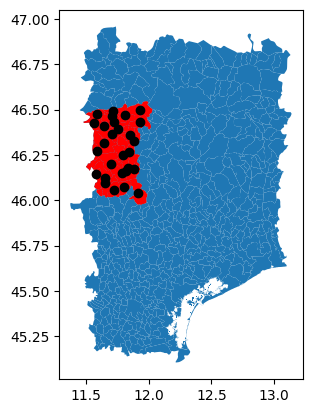

In [9]:
ax = gdf.plot()
gdf_subset.plot(ax=ax, color="red")
gdf_centroid.plot(ax=ax, color="k")